In [10]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
import networkx as nx
import ujson
import os


In [11]:
def plot_dendrogram(distance_matrix, labels, linkage="single",
                truncate_level=-1, figure_size=(20, 15),
                dpi=300, savefig=False, fig_name="output.png"):
    
    cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                                compute_full_tree=True, linkage=linkage, compute_distances=True)
    print("labels: ", labels)
    cl.fit(distance_matrix)
        
    kwarg = {"truncate_mode": "level", "p": truncate_level, "orientation": "right", "labels": labels}
        
    n_samples = len(cl.labels_)
    counts = np.zeros(cl.children_.shape[0])
    plt.figure(figsize=figure_size, dpi=dpi)
    for i, merge in enumerate(cl.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

        linkage_matrix = np.column_stack(
            [cl.children_, cl.distances_, counts]
        ).astype(float)
        dendrogram(linkage_matrix, **kwarg)
        pass
        
    if savefig is True:
        plt.savefig(fig_name)
        

In [12]:
def d1(similarity: np.ndarray, r: float) -> np.ndarray:
    ret = 1/np.power(r, similarity)
    np.fill_diagonal(ret, 0)
    return ret

In [13]:
data_dir = "/Users/sujeet/Deep_Structure/data/"

In [14]:
f_collab_distance = os.path.join(data_dir, "2023/common_references_2023.csv")
df_collab_distance = pd.read_csv(f_collab_distance)
faculties = list(df_collab_distance.columns)    # Obtain a list of facauty names
faculties.pop(0)
print("faculties: ", faculties)


faculties:  ['Ford, Kevin B.', 'Tyson, Jeremy T.', 'Hirani, Anil N.', 'Katz, Sheldon H.', 'Albin, Pierre', 'Dunfield, Nathan M.', 'Kostochka, Alexandr V.', 'Kedem, Rinat', 'Song, Renming', 'Dodd, Christopher', 'Duursma, Iwan Maynard', 'McCarthy, Randy', 'Rezk, Charles W.', 'Fernandes, Rui Loja', 'Mineyev, Igor', 'Dutta, Sankar Prasad', 'Yong, Alexander T. F.', 'Tolman, Susan', 'Erdoğan, Mehmet Burak', 'Junge, Marius', 'Hur, Vera Mikyoung', 'Stojanoska, Vesna', 'Ahlgren, Scott D.', 'Bradlow, Steven Benjamin', 'Rapti, Zoi', 'Sowers, Richard B.', 'Balogh, József', 'Kutzarova, Denka N.', 'Zaharescu, Alexandru', 'La Nave, Gabriele', 'Berwick-Evans, Daniel', 'DeVille, R. E. Lee', 'Boca, Florin-Petre', 'Thorner, Jesse', 'Zharnitsky, Vadim', 'Lerman, Eugene M.', 'Reznick, Bruce', 'Dey, Partha Sarathi', 'Hinkkanen, Aimo', 'Nikolaev, Igor G.', 'Pascaleff, James Thomas', 'Bronski, Jared C.', 'Feng, Runhuan', 'Haboush, William J.', 'Baryshnikov, Yuliy M.', 'Kirr, Eduard', 'Oikhberg, Timur', 'Ledit

labels:  ['Ford, Kevin B.', 'Tyson, Jeremy T.', 'Hirani, Anil N.', 'Katz, Sheldon H.', 'Albin, Pierre', 'Dunfield, Nathan M.', 'Kostochka, Alexandr V.', 'Kedem, Rinat', 'Song, Renming', 'Dodd, Christopher', 'Duursma, Iwan Maynard', 'McCarthy, Randy', 'Rezk, Charles W.', 'Fernandes, Rui Loja', 'Mineyev, Igor', 'Dutta, Sankar Prasad', 'Yong, Alexander T. F.', 'Tolman, Susan', 'Erdoğan, Mehmet Burak', 'Junge, Marius', 'Hur, Vera Mikyoung', 'Stojanoska, Vesna', 'Ahlgren, Scott D.', 'Bradlow, Steven Benjamin', 'Rapti, Zoi', 'Sowers, Richard B.', 'Balogh, József', 'Kutzarova, Denka N.', 'Zaharescu, Alexandru', 'La Nave, Gabriele', 'Berwick-Evans, Daniel', 'DeVille, R. E. Lee', 'Boca, Florin-Petre', 'Thorner, Jesse', 'Zharnitsky, Vadim', 'Lerman, Eugene M.', 'Reznick, Bruce', 'Dey, Partha Sarathi', 'Hinkkanen, Aimo', 'Nikolaev, Igor G.', 'Pascaleff, James Thomas', 'Bronski, Jared C.', 'Feng, Runhuan', 'Haboush, William J.', 'Baryshnikov, Yuliy M.', 'Kirr, Eduard', 'Oikhberg, Timur', 'Leditzky

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


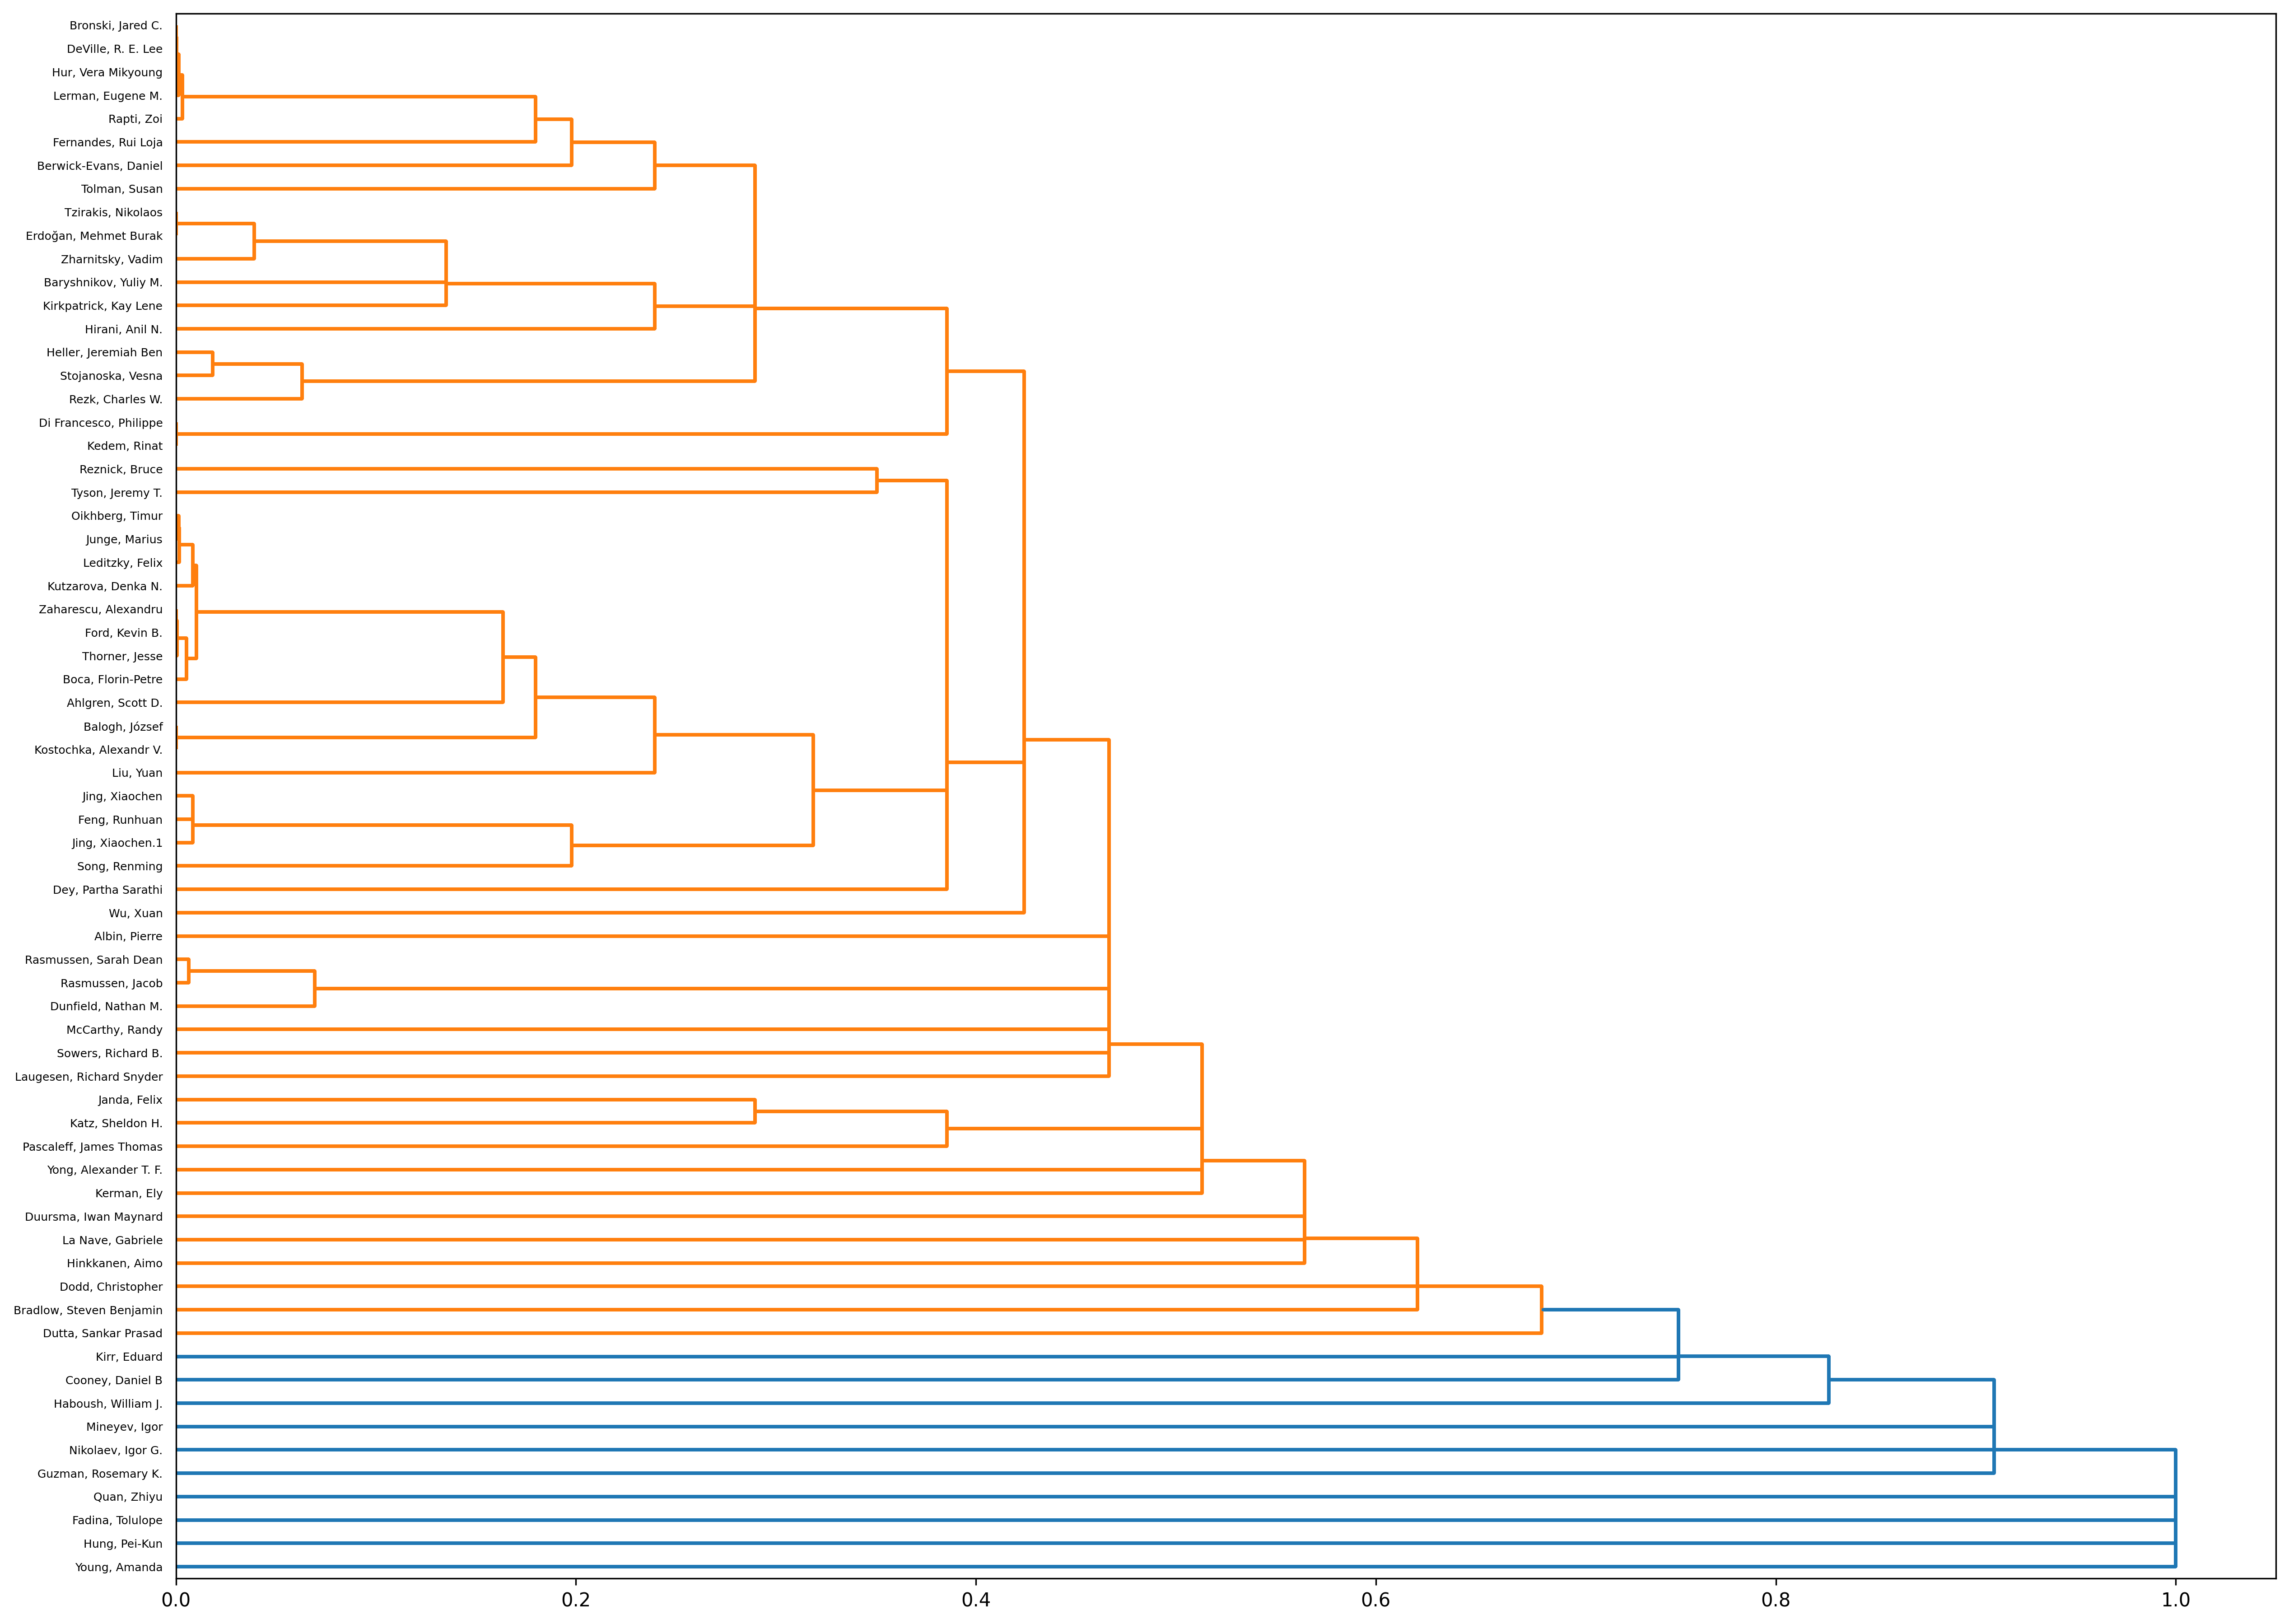

In [20]:
f_com_ref = os.path.join(data_dir, "2023/common_references_2023.csv")
df_com_ref = pd.read_csv(f_com_ref)
sim_com_ref = df_com_ref[faculties].to_numpy()
plot_dendrogram(d1(sim_com_ref, 1.1), faculties, linkage="single")